In [1]:
#Load the csv file into a dataframe
import pandas as pd

df=pd.read_csv('Placement_Data_Full_Class.csv')
df=df.drop(['salary','sl_no'],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


### Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [3]:
#Details
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [4]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [5]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [6]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

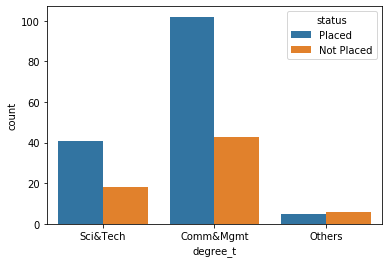

In [7]:
#Distribution of placements of students belonging to different majors (Bachelor's)
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#df['degree_t'].value_counts().plot(kind='bar', title='Fields of Study (Bachelor\'s)')
sns.countplot(data=df,x='degree_t',hue='status')


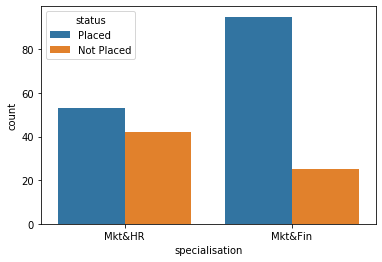

In [8]:
sns.countplot(data=df,x='specialisation',hue='status')

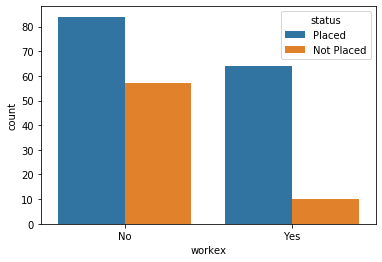

In [9]:
sns.countplot(data=df,x='workex',hue='status')

In [10]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df1=df
df1['gender'] = le.fit_transform(df1['gender'])
df1['ssc_b'] = le.fit_transform(df1['ssc_b'])
df1['hsc_b'] = le.fit_transform(df1['hsc_b'])
df1['hsc_s'] = le.fit_transform(df1['hsc_s'])
df1['degree_t'] = le.fit_transform(df1['degree_t'])
df1['workex'] = le.fit_transform(df1['workex'])
df1['specialisation'] = le.fit_transform(df1['specialisation'])
df1['status'] = le.fit_transform(df1['status'])

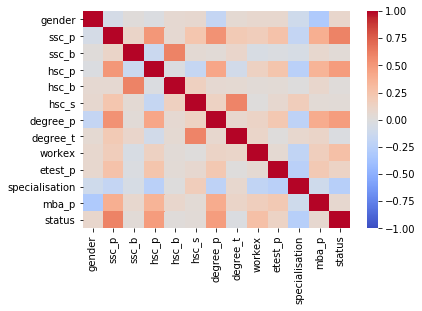

In [11]:
corr=df.corr()
sns.heatmap(corr,vmin=-1.0,vmax=1.0,cmap='coolwarm')

In [12]:
from scipy import stats
a,_=stats.pearsonr(df['degree_p'],df['ssc_p'])
b,_=stats.pearsonr(df['hsc_p'],df['ssc_p'])
c,_=stats.pearsonr(df['ssc_b'],df['hsc_b'])
d,_=stats.pearsonr(df['hsc_s'],df['degree_t'])
print(a,b,c,d)

0.5384039990695757 0.5114721015997727 0.6058833213959574 0.5962995940349635


In [13]:
#They seem to be very corelated, so they are transformed into one column
avg=(df['ssc_p']+df['hsc_p']+df['degree_p'])/3
df['average_p']=avg
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,average_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,72.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,78.380000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,65.666667
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,53.333333
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,77.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,80.066667
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,63.333333
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,69.000000
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,66.000000


In [35]:
kw=df['average_p'].kurtosis()
print("Kurtosis of average_p: ", kw)

Kurtosis of average_p:  -0.25675717799741404


In [36]:
mean=df['average_p'].mean()
print("Mean of average_p: ", mean)

Mean of average_p:  66.66891472868215


In [37]:
skw=df['average_p'].skew()
print("Skewness of average_p: ", skw)

Skewness of average_p:  -0.1591144514402325


In [40]:
std=df['average_p'].std()
print("Standard Deviation of average_p: ", std)

Standard Deviation of average_p:  7.9321136697247425


### Principle Component Analysis

In [14]:
from sklearn.preprocessing import StandardScaler

features=['mba_p','etest_p','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','average_p']
target=['status']

x=df.loc[:,features]
y=df.loc[:,target]
#x=StandardScaler().fit_transform(x)

In [15]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
principlecomponents=pca.fit_transform(x)
principleDataframe=pd.DataFrame(data=principlecomponents,columns = ['PC1', 'PC2','PC3','PC4','PC5'])

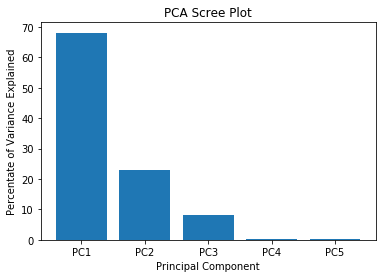

In [16]:
import numpy as np

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5']
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [17]:
targetDataframe = df[['status']]
newDataframe = pd.concat([principleDataframe,targetDataframe],axis = 1)

In [18]:
pca.explained_variance_ratio_

array([0.68108191, 0.22862859, 0.08214454, 0.00345379, 0.00140504])

In [19]:
newDataframe


,PC1,PC2,PC3,PC4,PC5,status
0,-15.376737,-8.098629,-5.556160,1.204415,-0.521854,1
1,17.429661,-7.315275,-1.969201,1.414330,0.174232,1
2,1.857145,3.743129,-3.506140,-1.181292,0.579644,1
3,-9.777551,10.648046,3.758669,1.592548,0.896766,0
4,25.487010,1.348372,-11.127241,-0.739678,0.564727,1
...,...,...,...,...,...,...
210,23.324019,-11.017302,4.462223,-0.884903,-0.714925,1
211,-0.299754,7.242334,-6.058608,1.694304,-0.620438,1
212,-10.803835,-9.253427,5.456201,-0.741911,-0.752456,1
213,-2.481119,0.850201,-1.471274,-0.604392,-0.614951,1


In [20]:
predictors=['PC1','PC2','PC3']
output=['status']

data=newDataframe.loc[:,predictors].values
target=newDataframe.loc[:,output].values

In [21]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets (70% for training and 30% for testing)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 20, random_state = 3)
pred=clf.fit(data_train, target_train).predict(data_test)
print("Random Forest accuracy : ", accuracy_score(target_test, pred, normalize = True))

Random Forest accuracy :  0.8153846153846154


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [23]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7846153846153846


D:\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the classifier. Using KNN=3 gave the best accuracy.
neigh = KNeighborsClassifier(n_neighbors=8)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8307692307692308


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


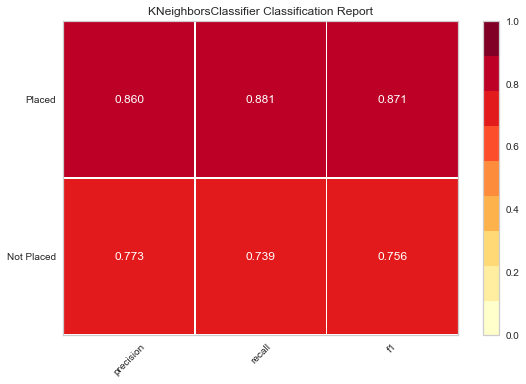

In [25]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Not Placed','Placed'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(data_train, target_train)
pred = logmodel.predict(data_test)
# evaluate accuracy
print ("Logistic accuracy score : ",accuracy_score(target_test, pred))

Logistic accuracy score :  0.8


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
